# Chapter 8: Analyzing Tables Using Python

In [1]:
# 8.1 Storing tables using basic Python
# Storing a table using Python data structures
fish_measures = {'Fish': ['Angelfish', 'Zebrafish', 'Killerfish', 'Swordtail'],
                'Length': [15.2, 6.5, 9, 6],
                'Width': [7.7, 2.1, 4.5, 2]}

In [3]:
# Accessing table columns using a dictionary
zebrafish_index = fish_measures['Fish'].index('Zebrafish')
zebrafish_length = fish_measures['Length'][zebrafish_index]
print(f"The length of a zebrafish is {zebrafish_length:.2f} cm.")

The length of a zebrafish is 6.50 cm.


In [11]:
# 8.2 Exploring tables using Pandas
import pandas as pd
import numpy as np

In [5]:
# Loading a table into Pandas
df = pd.DataFrame(fish_measures)
print(df)

         Fish  Length  Width
0   Angelfish    15.2    7.7
1   Zebrafish     6.5    2.1
2  Killerfish     9.0    4.5
3   Swordtail     6.0    2.0


In [6]:
# Accesssing the first two rows of a table
print(df.head(2))

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1


In [7]:
print(df.describe())

          Length     Width
count   4.000000  4.000000
mean    9.175000  4.075000
std     4.225616  2.678775
min     6.000000  2.000000
25%     6.375000  2.075000
50%     7.750000  3.300000
75%    10.550000  5.300000
max    15.200000  7.700000


In [9]:
# Computing the numeric column mean
print(df.mean())

Length    9.175
Width     4.075
dtype: float64


C:\Users\meowm\AppData\Local\Temp\ipykernel_10540\2508693539.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


In [13]:
# Summarizing the string columns
print(df.describe(include=[object]))

             Fish
count           4
unique          4
top     Angelfish
freq            1


In [14]:
# Retrieving the table as a 2D NumPy array
print(df.values)
assert type(df.values) == np.ndarray

[['Angelfish' 15.2 7.7]
 ['Zebrafish' 6.5 2.1]
 ['Killerfish' 9.0 4.5]
 ['Swordtail' 6.0 2.0]]


In [16]:
# 8.3 Retrieving table columns
# Accessing all the column names
print(df.columns)

Index(['Fish', 'Length', 'Width'], dtype='object')


In [17]:
# Accessing an individual column
print(df.Fish)

0     Angelfish
1     Zebrafish
2    Killerfish
3     Swordtail
Name: Fish, dtype: object


In [18]:
# Retrieving a column as a NumPy array
print(df.Fish.values)
assert type(df.Fish.values) == np.ndarray

['Angelfish' 'Zebrafish' 'Killerfish' 'Swordtail']


In [19]:
# Accessing a column using brackets
print(df['Fish'])

0     Angelfish
1     Zebrafish
2    Killerfish
3     Swordtail
Name: Fish, dtype: object


In [20]:
# Accessing multiple columns using brackets
print(df[['Fish', 'Length']])

         Fish  Length
0   Angelfish    15.2
1   Zebrafish     6.5
2  Killerfish     9.0
3   Swordtail     6.0


In [21]:
# Sorting rows by column value
print(df.sort_values('Length'))

         Fish  Length  Width
3   Swordtail     6.0    2.0
1   Zebrafish     6.5    2.1
2  Killerfish     9.0    4.5
0   Angelfish    15.2    7.7


In [22]:
# Filtering rows by column value
print(df[df.Width >= 3])

         Fish  Length  Width
0   Angelfish    15.2    7.7
2  Killerfish     9.0    4.5


In [23]:
# 8.4 Retrieving table rows
# Accessing rows by index
print(df.loc[[0, 3]])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [24]:
# Accessing rows by column value
booleans = [name in ['Angelfish', 'Swordtail'] for name in df.Fish]
print(df[booleans])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [27]:
# Accessing rows by column value using isin()
print(df[df.Fish.isin(['Angelfish', 'Swordtail'])])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [28]:
# Swapping row indices for column values
df.set_index('Fish', inplace=True)
print(df)

            Length  Width
Fish                     
Angelfish     15.2    7.7
Zebrafish      6.5    2.1
Killerfish     9.0    4.5
Swordtail      6.0    2.0


In [29]:
# Accessing rows by string index (after replacing row numbers with row names)
print(df.loc[['Angelfish', 'Swordtail']])

           Length  Width
Fish                    
Angelfish    15.2    7.7
Swordtail     6.0    2.0


In [30]:
# 8.5 Modifying table rows and columns
# Swapping rows and columns
df_transposed = df.T
print(df_transposed)

Fish    Angelfish  Zebrafish  Killerfish  Swordtail
Length       15.2        6.5         9.0        6.0
Width         7.7        2.1         4.5        2.0


In [31]:
# Printing a transposed column
print(df_transposed.Swordtail)

Length    6.0
Width     2.0
Name: Swordtail, dtype: float64


In [32]:
# Adding a new column
df_transposed['Clownfish'] = [10.6, 3.7]
print(df_transposed)

Fish    Angelfish  Zebrafish  Killerfish  Swordtail  Clownfish
Length       15.2        6.5         9.0        6.0       10.6
Width         7.7        2.1         4.5        2.0        3.7


In [38]:
# Adding multiple new columns
df_new = df_transposed.assign(Clownfish2=[10.6, 3.7], Clownfish3=[10.6, 3.7])
assert 'Clownfish2' not in df_transposed.columns
assert 'Clownfish2' in df_new.columns
print(df_new)

Fish    Angelfish  Zebrafish  Killerfish  Swordtail  Clownfish  Clownfish2  \
Length       15.2        6.5         9.0        6.0       10.6        10.6   
Width         7.7        2.1         4.5        2.0        3.7         3.7   

Fish    Clownfish3  
Length        10.6  
Width          3.7  


In [39]:
# Deleting multiple columns
df_new.drop(columns=['Clownfish2', 'Clownfish3'], inplace=True)
print(df_new)

Fish    Angelfish  Zebrafish  Killerfish  Swordtail  Clownfish
Length       15.2        6.5         9.0        6.0       10.6
Width         7.7        2.1         4.5        2.0        3.7


In [40]:
# Iterating over column values
import math
areas = []
for fish_species, (length, width) in df_new.items():
    area = math.pi * length * width / 4
    print(f"Area of {fish_species} is {area}")
    areas.append(area)

Area of Angelfish is 91.92300104403735
Area of Zebrafish is 10.720684930375171
Area of Killerfish is 31.808625617596654
Area of Swordtail is 9.42477796076938
Area of Clownfish is 30.80331596844792


In [42]:
# Adding a new row
df_new.loc['Area'] = areas
df_new.reindex()
print(df_new)

Fish    Angelfish  Zebrafish  Killerfish  Swordtail  Clownfish
Length  15.200000   6.500000    9.000000   6.000000  10.600000
Width    7.700000   2.100000    4.500000   2.000000   3.700000
Area    91.923001  10.720685   31.808626   9.424778  30.803316


In [43]:
# Checking the table shape
row_count, column_count = df_new.shape
print(f"Our table contains {row_count} rows and {column_count} columns")

Our table contains 3 rows and 5 columns


In [44]:
# 8.6 Saving and loading table data
# Saving a table to a CSV file
df_new.to_csv('Fish_measurements.csv')
with open('Fish_measurements.csv') as f:
    print(f.read())

,Angelfish,Zebrafish,Killerfish,Swordtail,Clownfish
Length,15.2,6.5,9.0,6.0,10.6
Width,7.7,2.1,4.5,2.0,3.7
Area,91.92300104403735,10.720684930375171,31.808625617596654,9.42477796076938,30.80331596844792



In [47]:
# Loading a table from a CSV file
df = pd.read_csv('Fish_measurements.csv', index_col=0)
print(df)
print("\nRow index names when column is assigned:")
print(df.index.values)

df_no_assign = pd.read_csv('Fish_measurements.csv')
print("\nRow index names when no column is assigned:")
print(df_no_assign.index.values)

        Angelfish  Zebrafish  Killerfish  Swordtail  Clownfish
Length  15.200000   6.500000    9.000000   6.000000  10.600000
Width    7.700000   2.100000    4.500000   2.000000   3.700000
Area    91.923001  10.720685   31.808626   9.424778  30.803316

Row index names when column is assigned:
['Length' 'Width' 'Area']

Row index names when no column is assigned:
[0 1 2]


In [51]:
# 8.7 Visualizing tables using Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

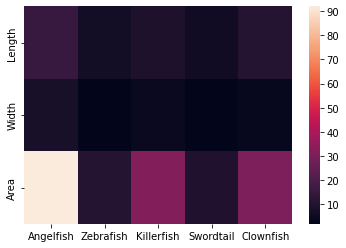

In [52]:
# Visualizing a heatmap using Seaborn
sns.heatmap(df)
plt.show()

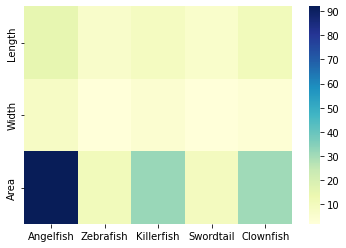

In [54]:
# Adjusting heatmap colors
sns.heatmap(df, cmap='YlGnBu')
plt.show()

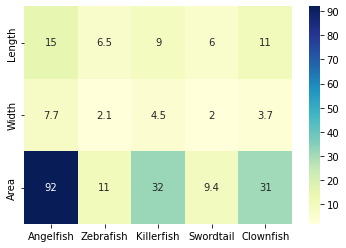

In [55]:
# Annotating the heatmap
sns.heatmap(df, cmap='YlGnBu', annot=True)
plt.show()

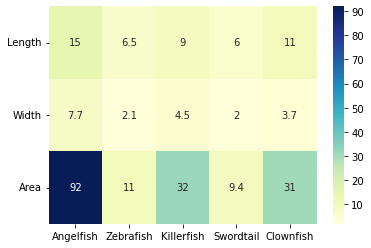

In [56]:
# Seaborn uses Matplotlib in its backend
# Rotating heatmap labels using Matplotlib
sns.heatmap(df, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.show()

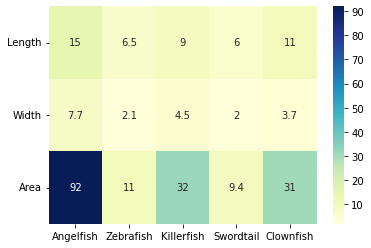

In [57]:
# Visualizing a heatmap from a NumPy array
sns.heatmap(df.values, cmap="YlGnBu", annot=True, xticklabels=df.columns, yticklabels=df.index)
plt.yticks(rotation=0)
plt.show()

In [58]:
# Key Words / Notes:

In [ ]:
# 2D table structures can easily be processed using Pandas; we can load the data into Pandas using dictionaries or external files
# Pandas stores each table in a data fram built on top of a NumPy array
# Columns in a data frame have a name, which we can use to access those specific columns (dictionary notation)
# Rows in a data frame are assigned numeric indices by default, which we can use to access those specific rows
#     Also possible to swap the numeric row indices for string names
# Summarize the contents of a data frame using the describe method; returns valuable statistics such as mean and std
# Heatmap: Visual diagram where the color corresponds to the metric we are looking for